FIX

In [8]:
from google.colab.patches import cv2_imshow   # For image display in Colab
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


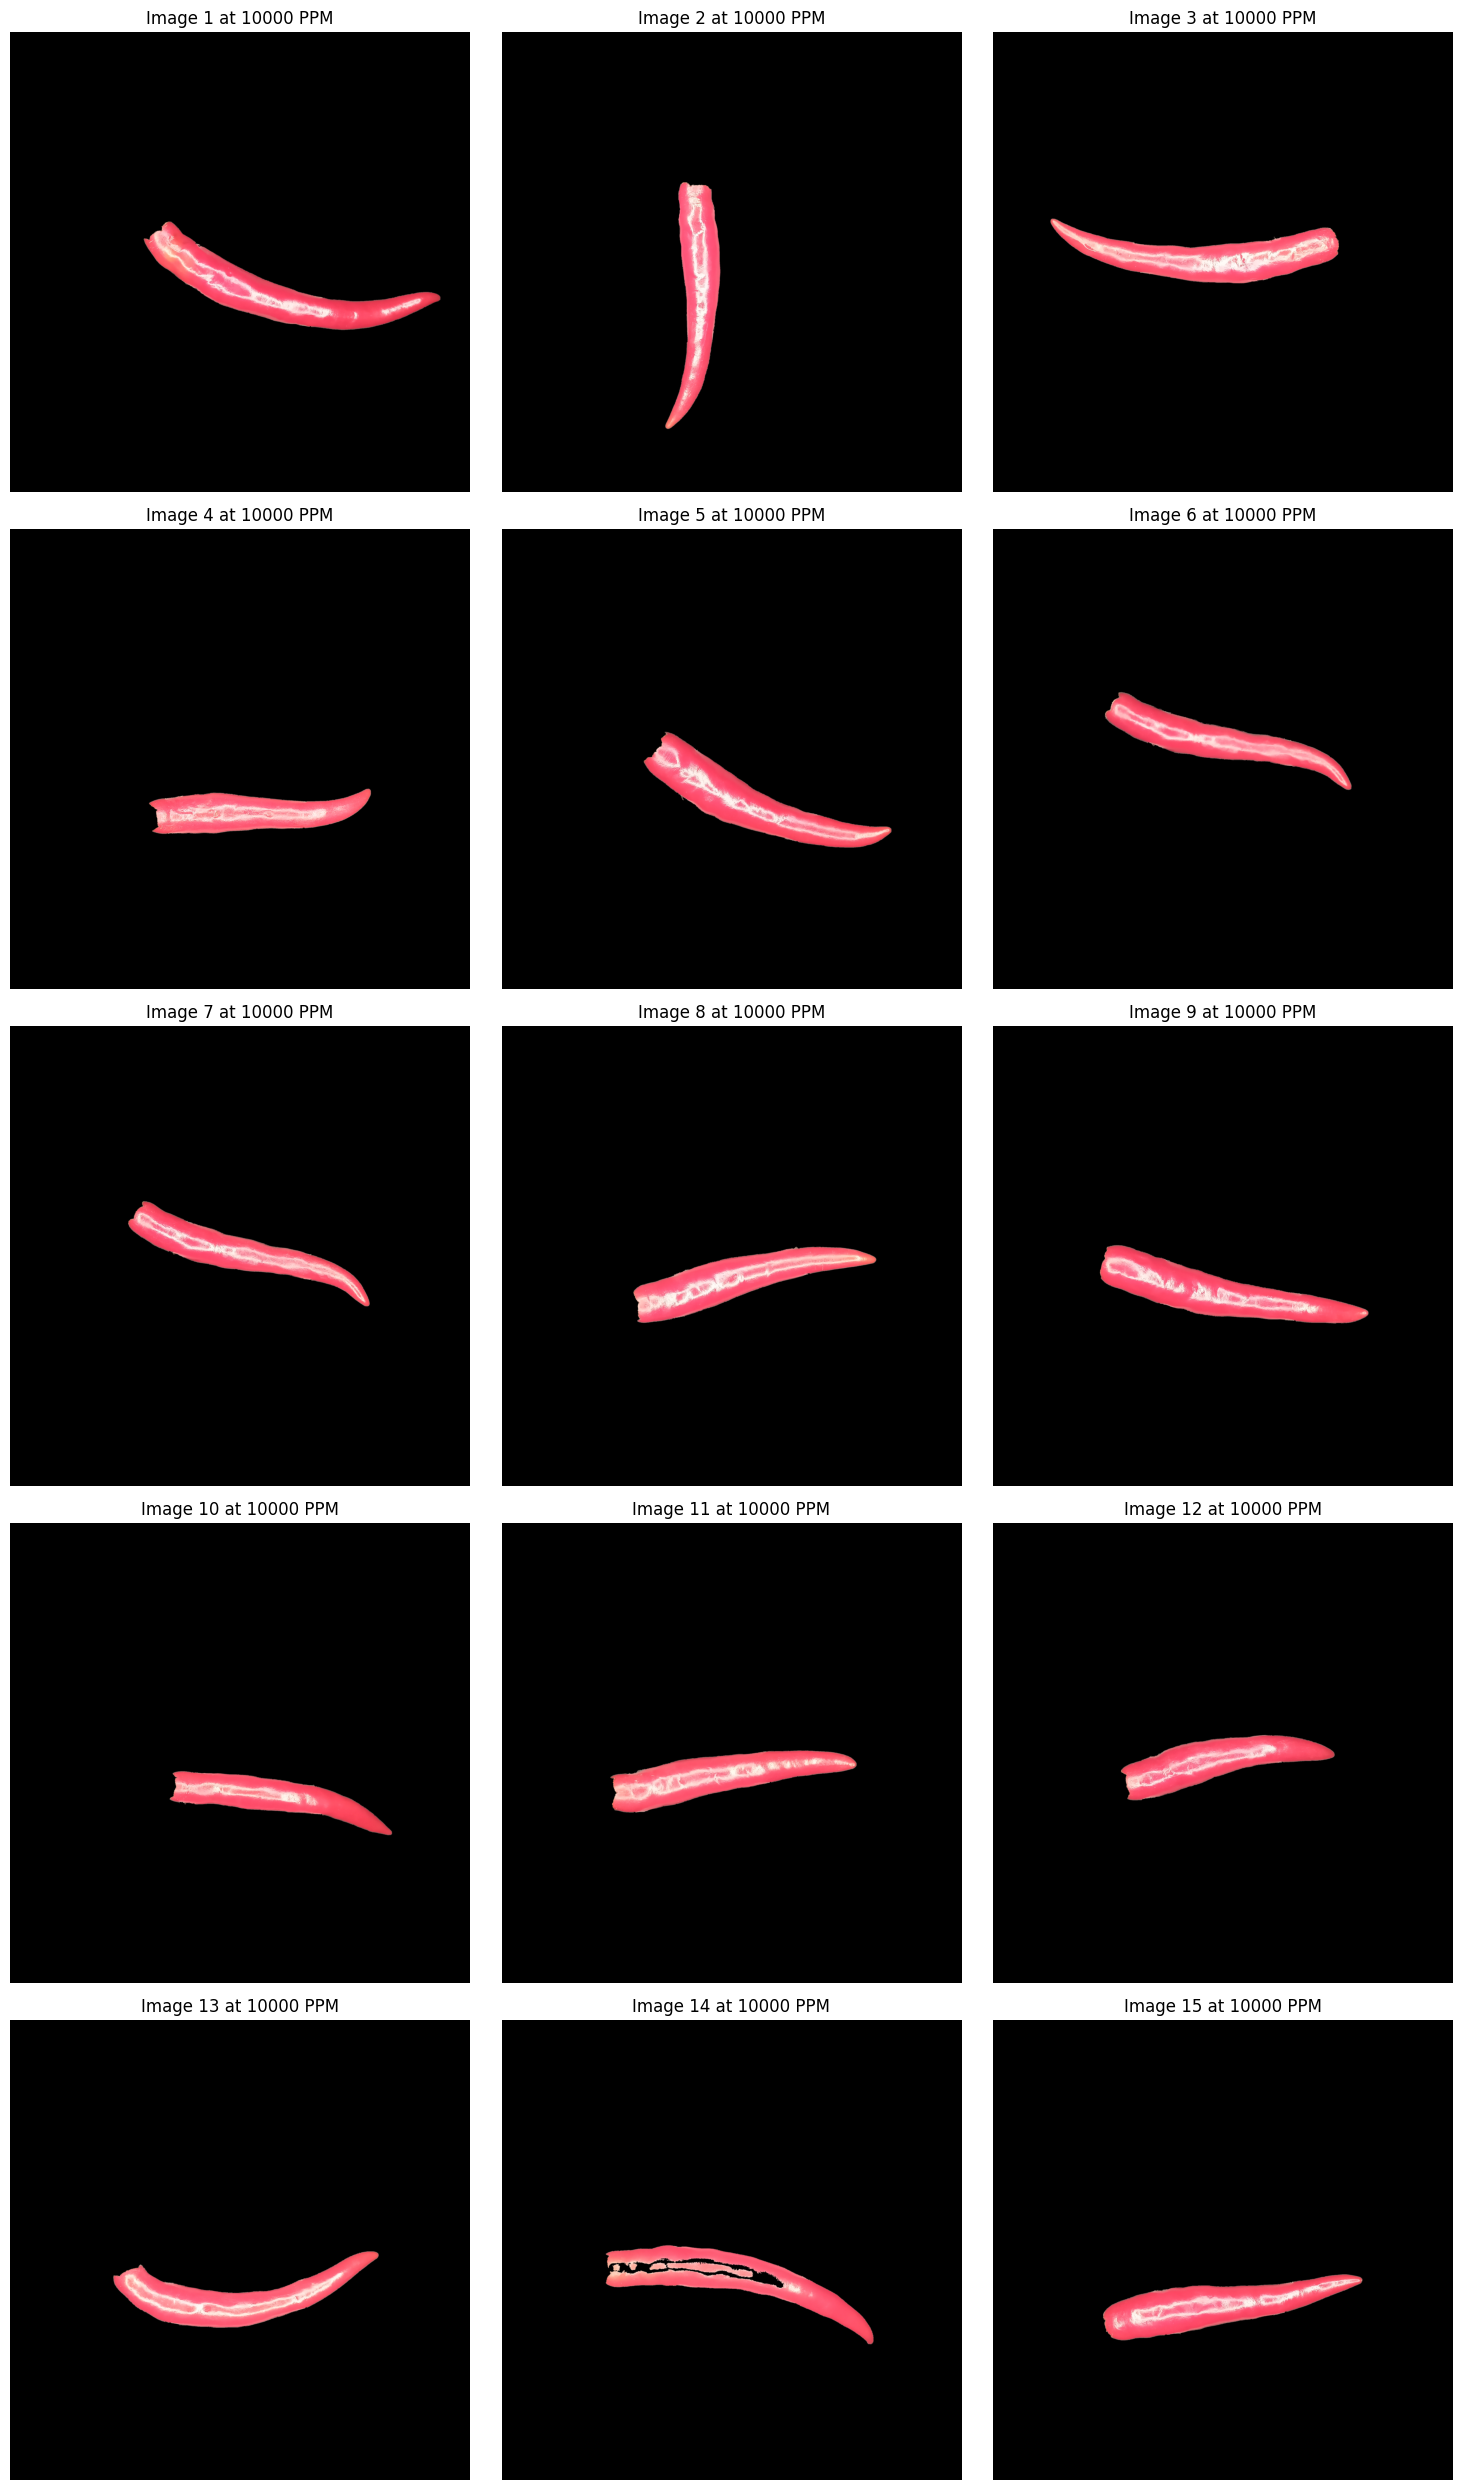

In [10]:
# Define the path to the directory containing images for 10000 ppm
ppm_10000_path = '/content/drive/MyDrive/Tugas Akhir_Zulfa Hana Maulida(1)/Dataset/Image/Multiclass/10000 ppm'

# Get the list of image files in the directory
image_files = sorted(os.listdir(ppm_10000_path))

# Calculate the number of rows needed
num_images = len(image_files)
num_rows = (num_images + 2) // 3  # Round up to the nearest multiple of 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Loop through each image
for i, image_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(ppm_10000_path, image_file)
    image = cv2.imread(image_path)

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for the red color range
    lower_red = np.array([0, 50, 100])
    upper_red = np.array([10, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    lower_red = np.array([160, 100, 100])
    upper_red = np.array([180, 255, 255])

    mask2 = cv2.inRange(hsv, lower_red, upper_red)

    mask = cv2.bitwise_or(mask1, mask2)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize variables to store the largest contour and its area
    largest_contour = None
    largest_area = 0

    # Filter contours based on area to identify larger red regions
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > largest_area:
            largest_area = area
            largest_contour = contour

    # If a valid contour is found, draw it on a blank mask
    if largest_contour is not None:
        chili_mask = np.zeros_like(mask)
        cv2.drawContours(chili_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

        # Apply the mask to the original image to get the segmented chili
        segmented_chili = cv2.bitwise_and(image, image, mask=chili_mask)

        # Plot the segmented chili on the corresponding subplot
        row_index = i // 3
        col_index = i % 3
        axes[row_index, col_index].imshow(cv2.cvtColor(segmented_chili, cv2.COLOR_BGR2RGB))
        axes[row_index, col_index].set_title(f"Image {i+1} at 10000 PPM")
        axes[row_index, col_index].axis('off')

        # Save the segmented chili
        result_path = '/content/drive/MyDrive/Tugas Akhir_Zulfa Hana Maulida(1)/Preprocessing/ROI/Image/Multiclass/10000 ppm'
        output_filename = f'{i+1}.jpg'
        cv2.imwrite(os.path.join(result_path, output_filename), segmented_chili)
    else:
        print(f"No chili region found in {image_path}.")

# Adjust layout and display
plt.tight_layout()
plt.show()


Try looping

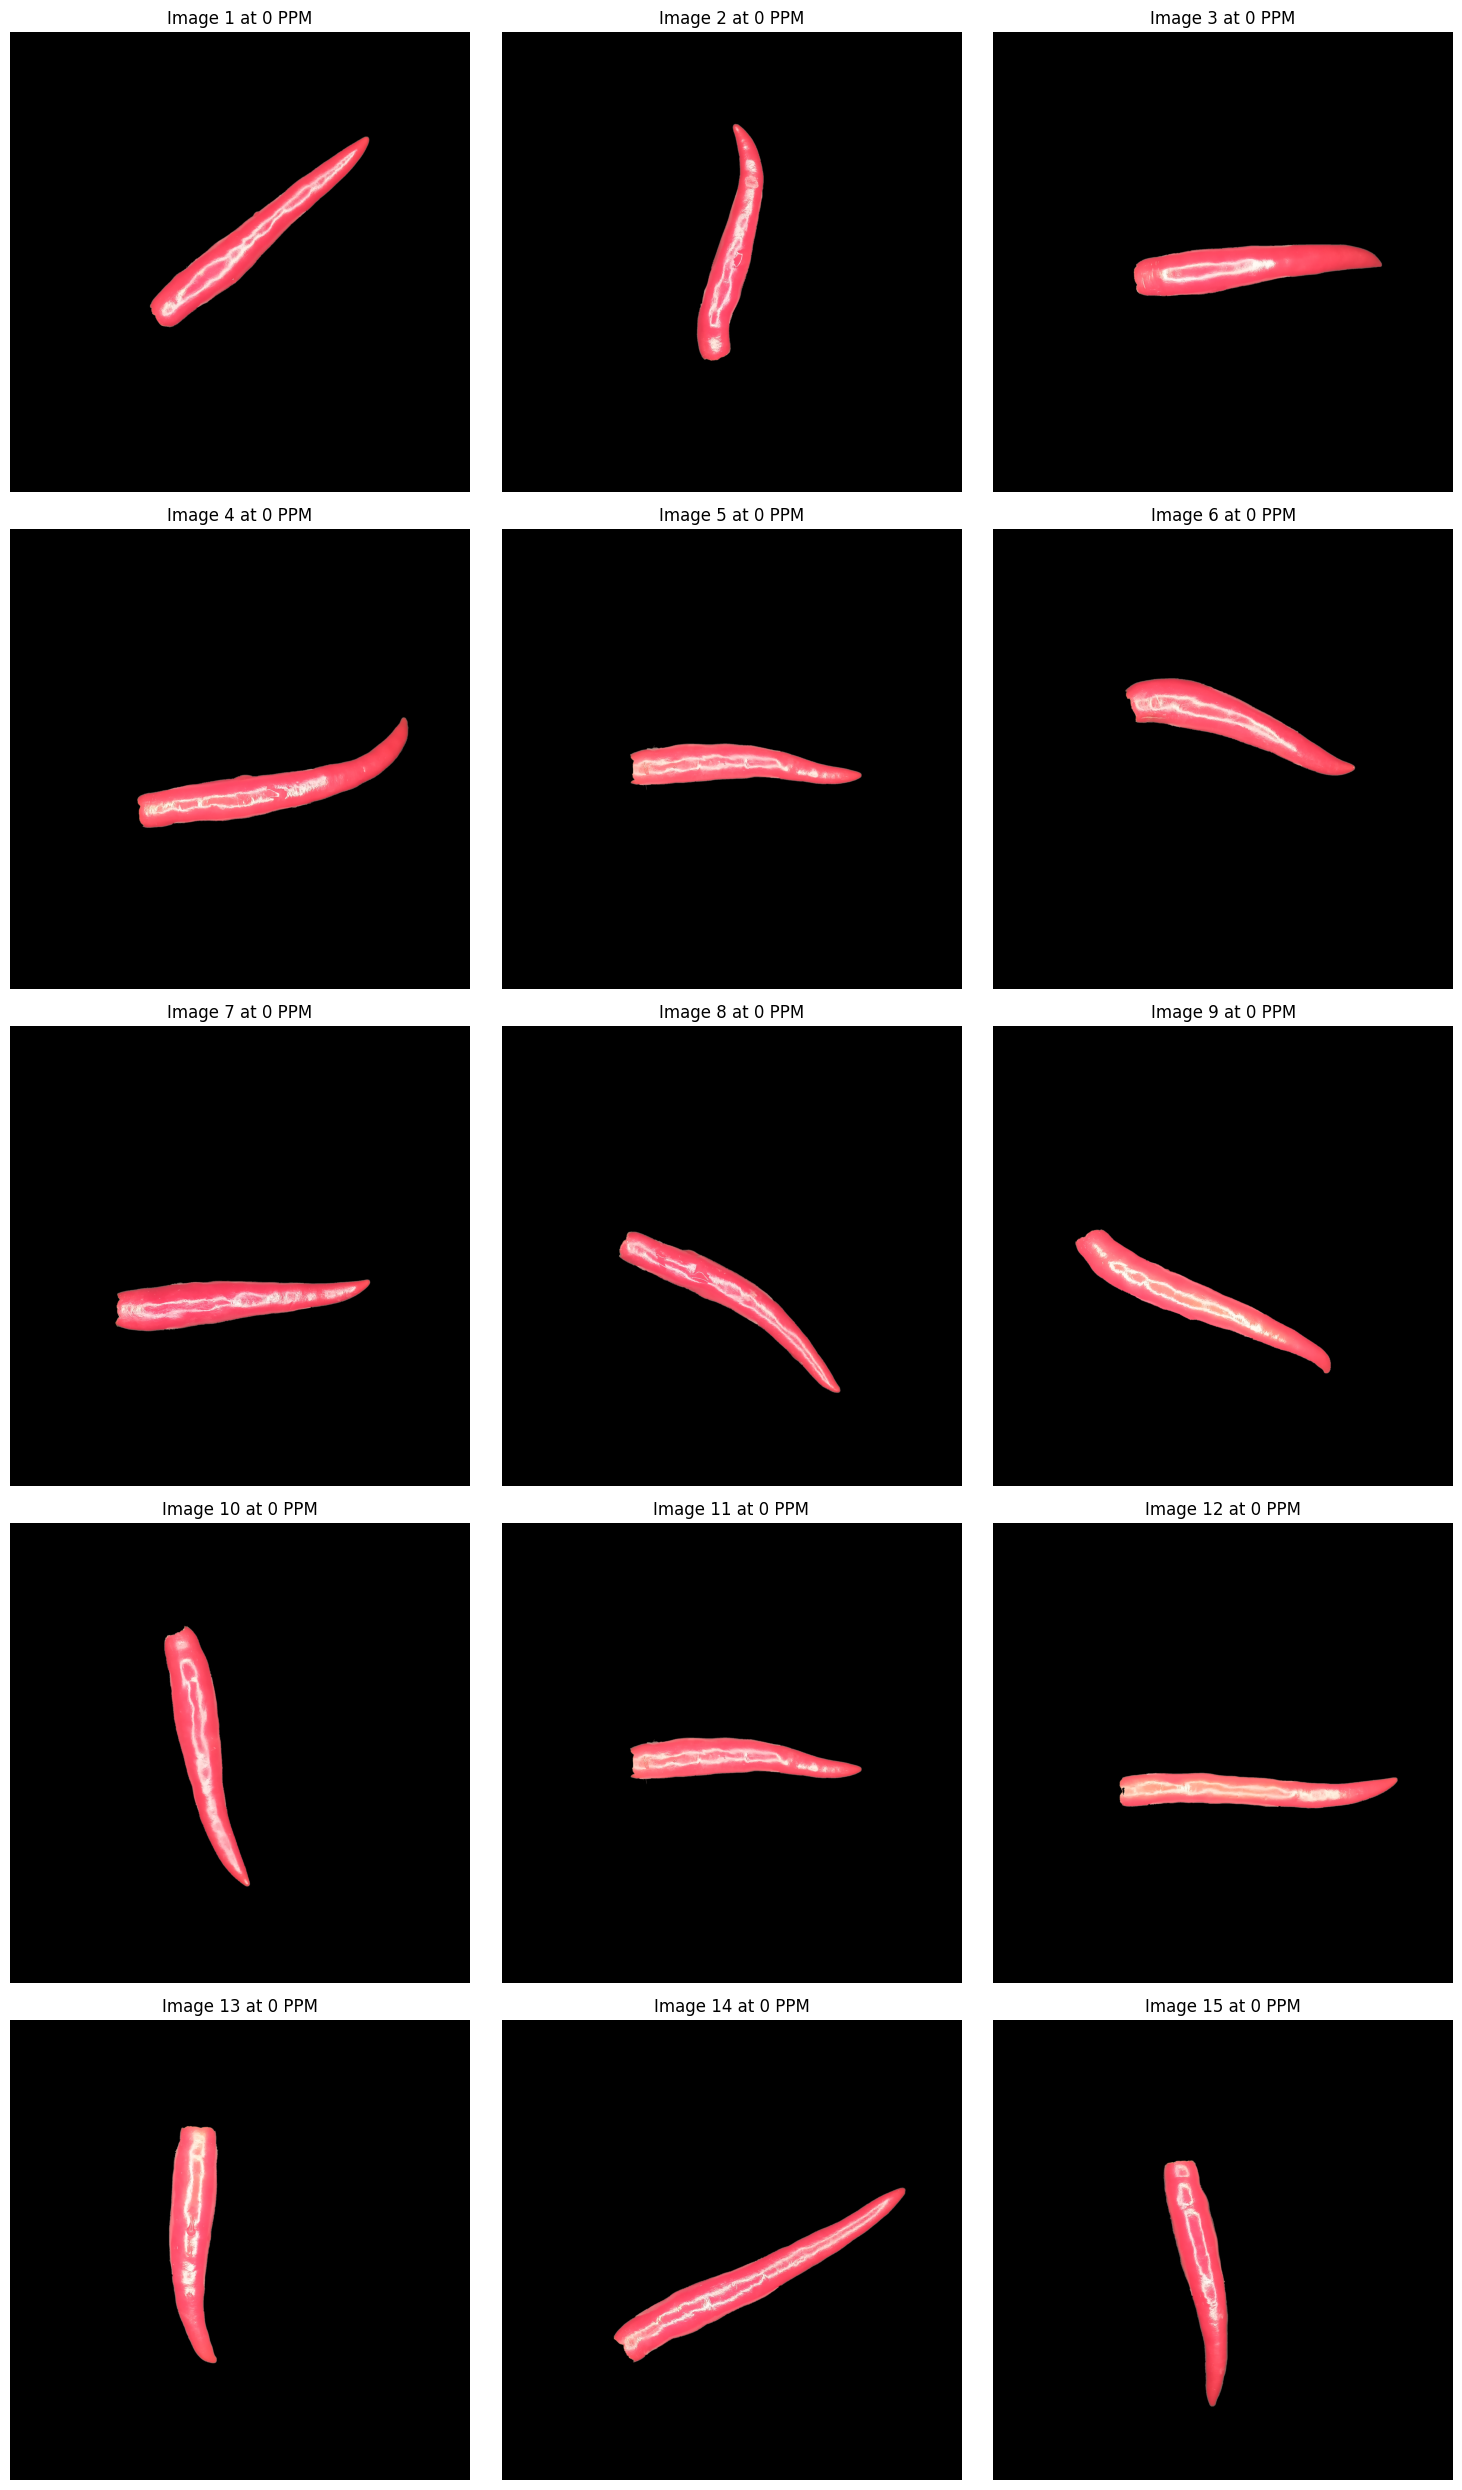

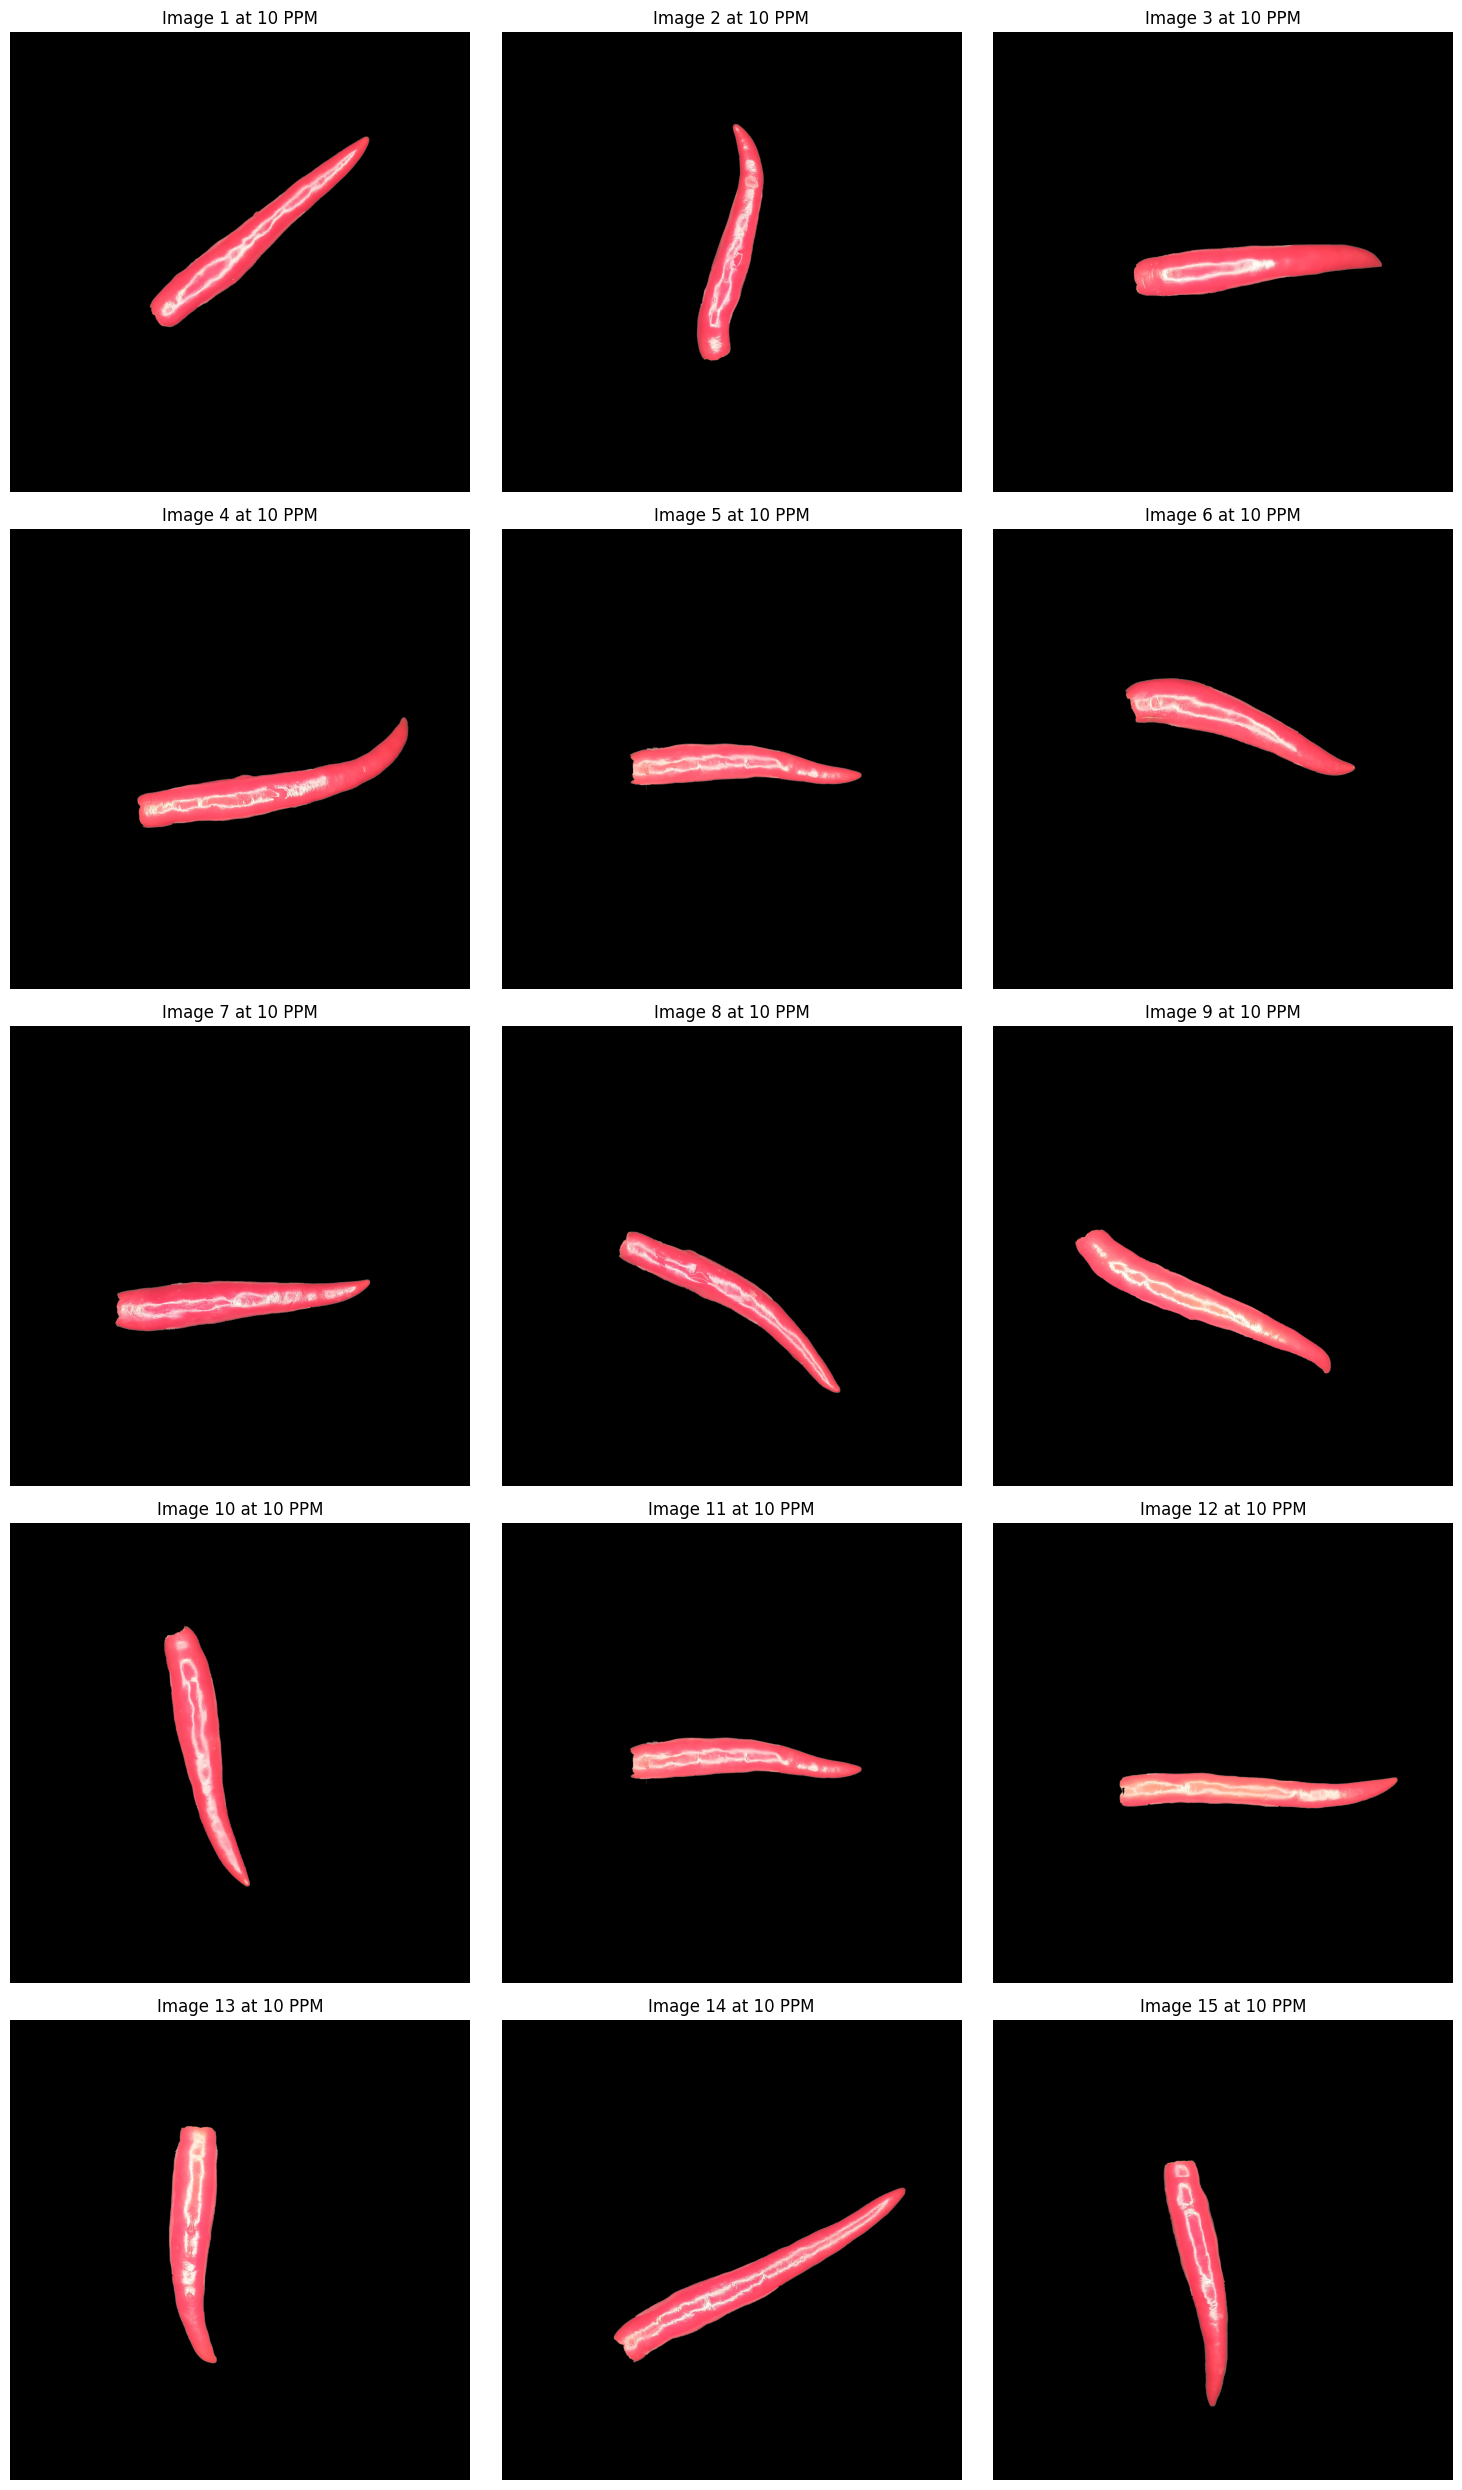

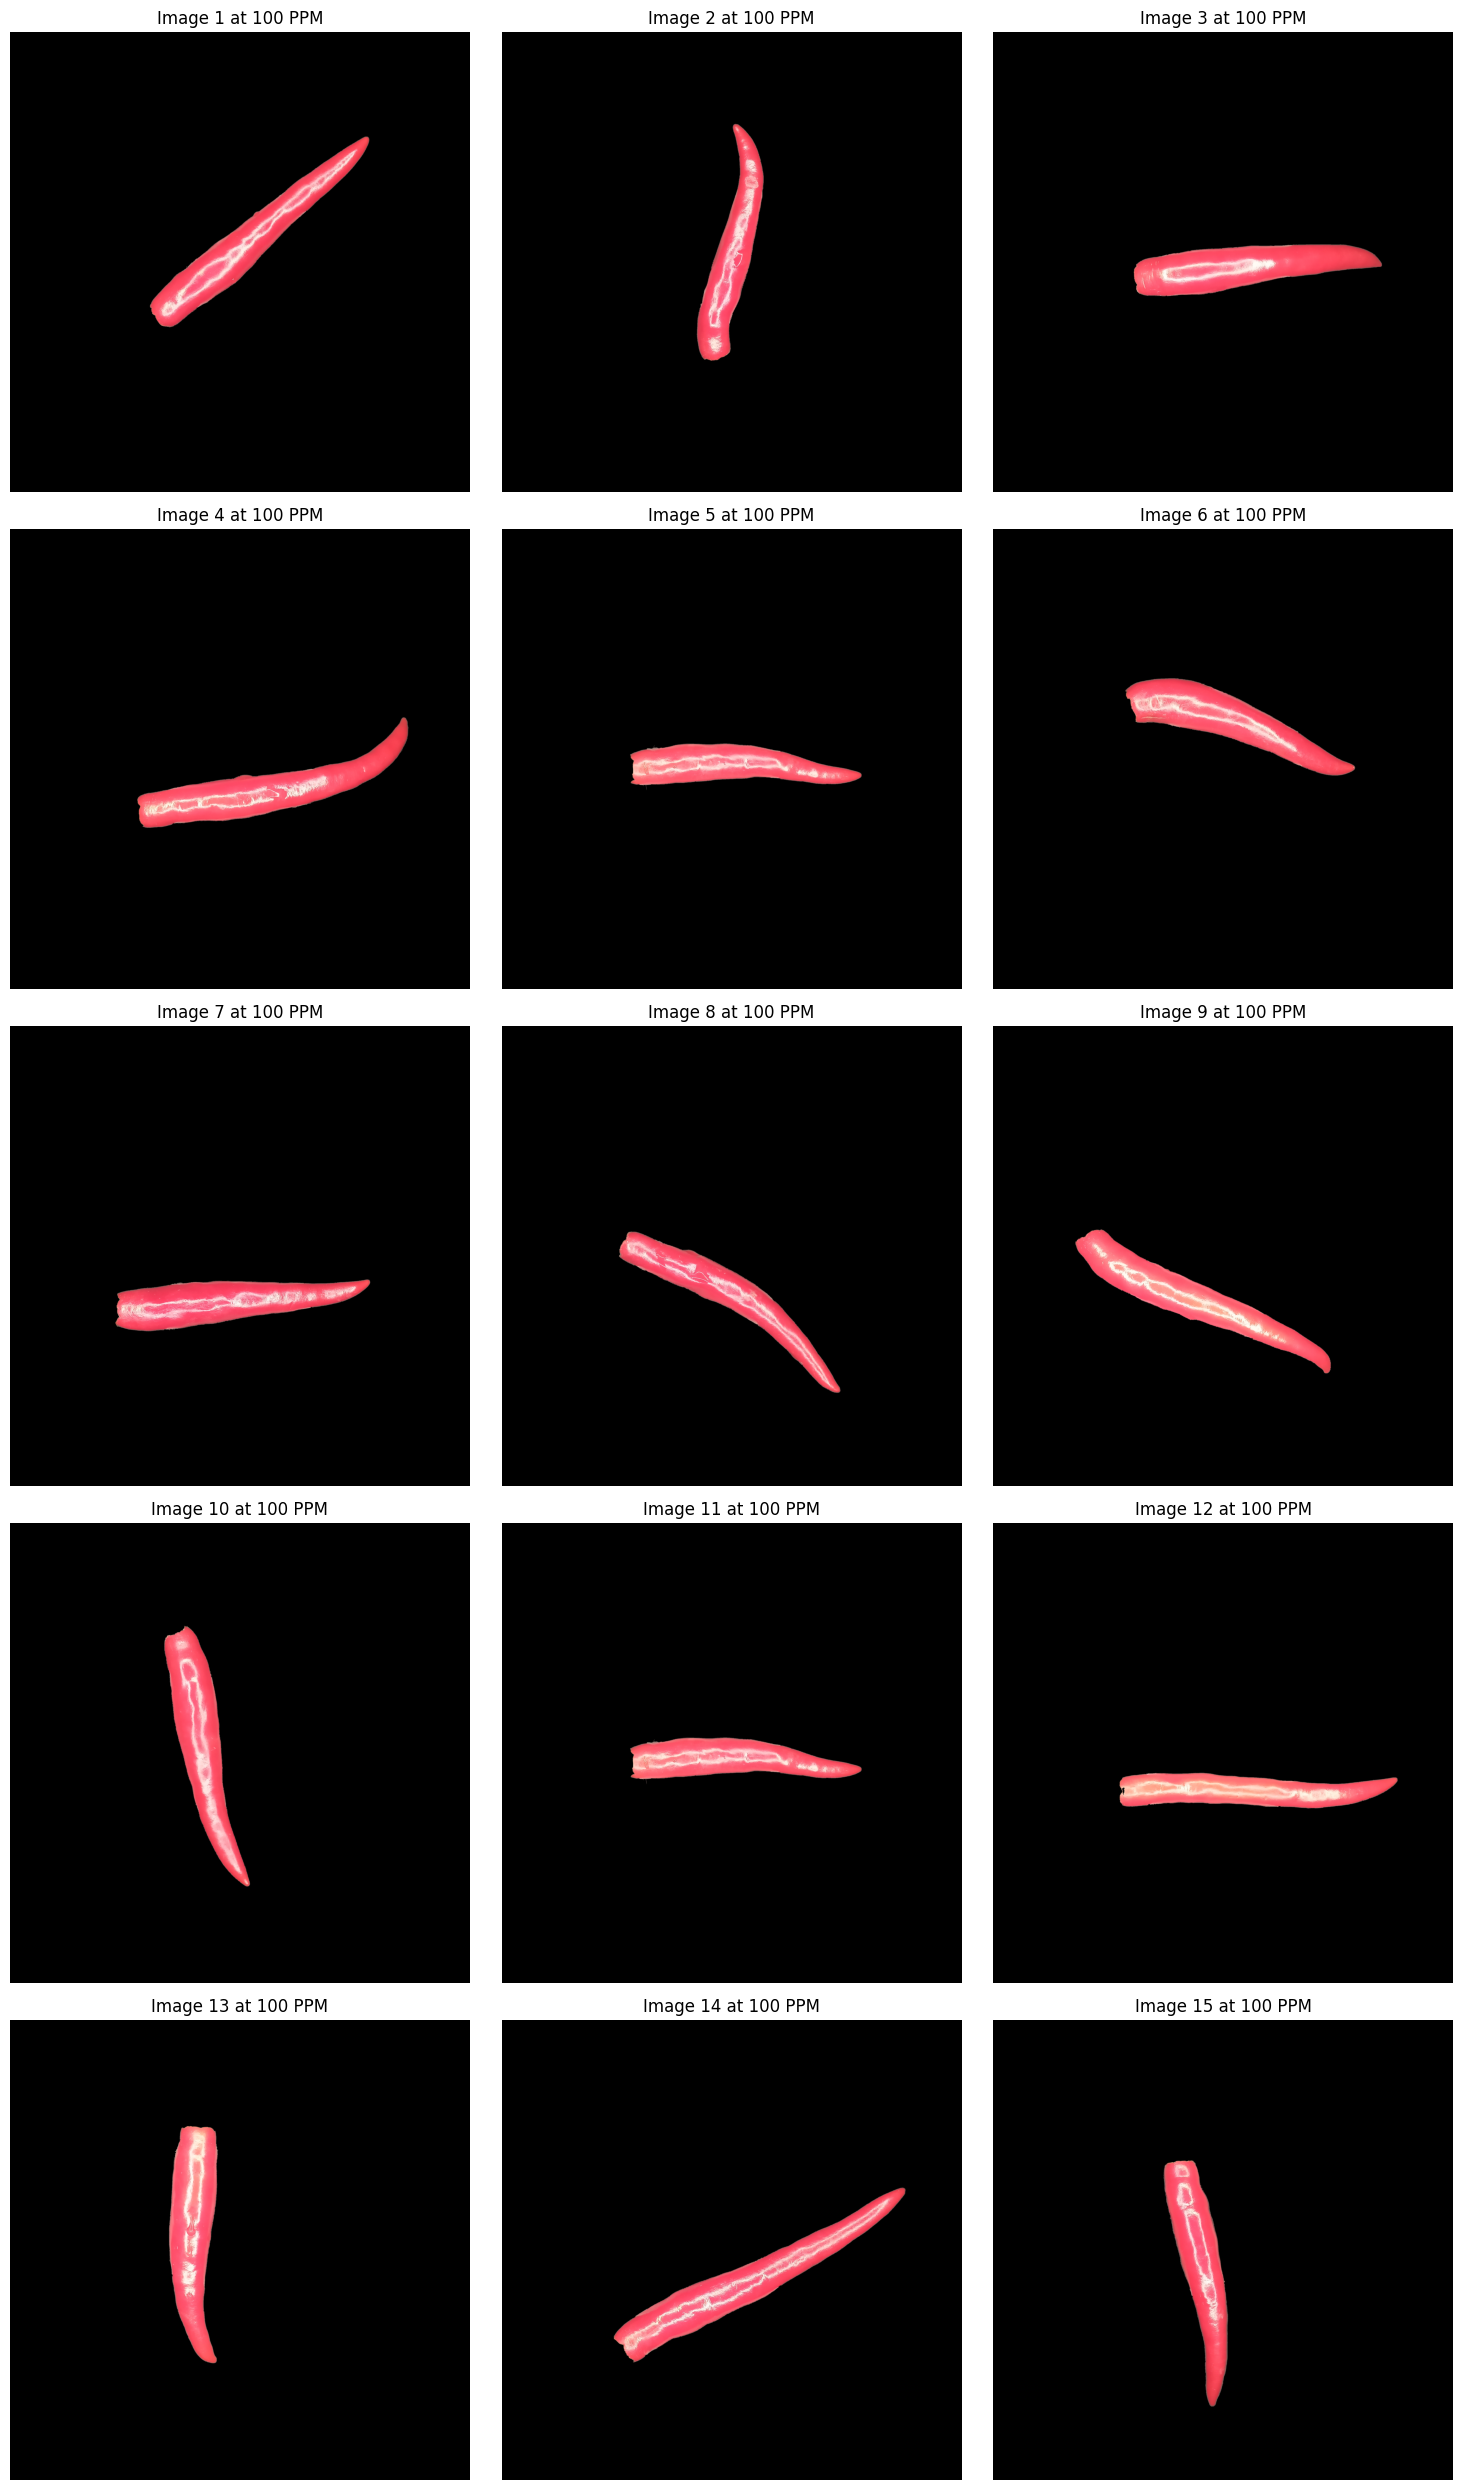

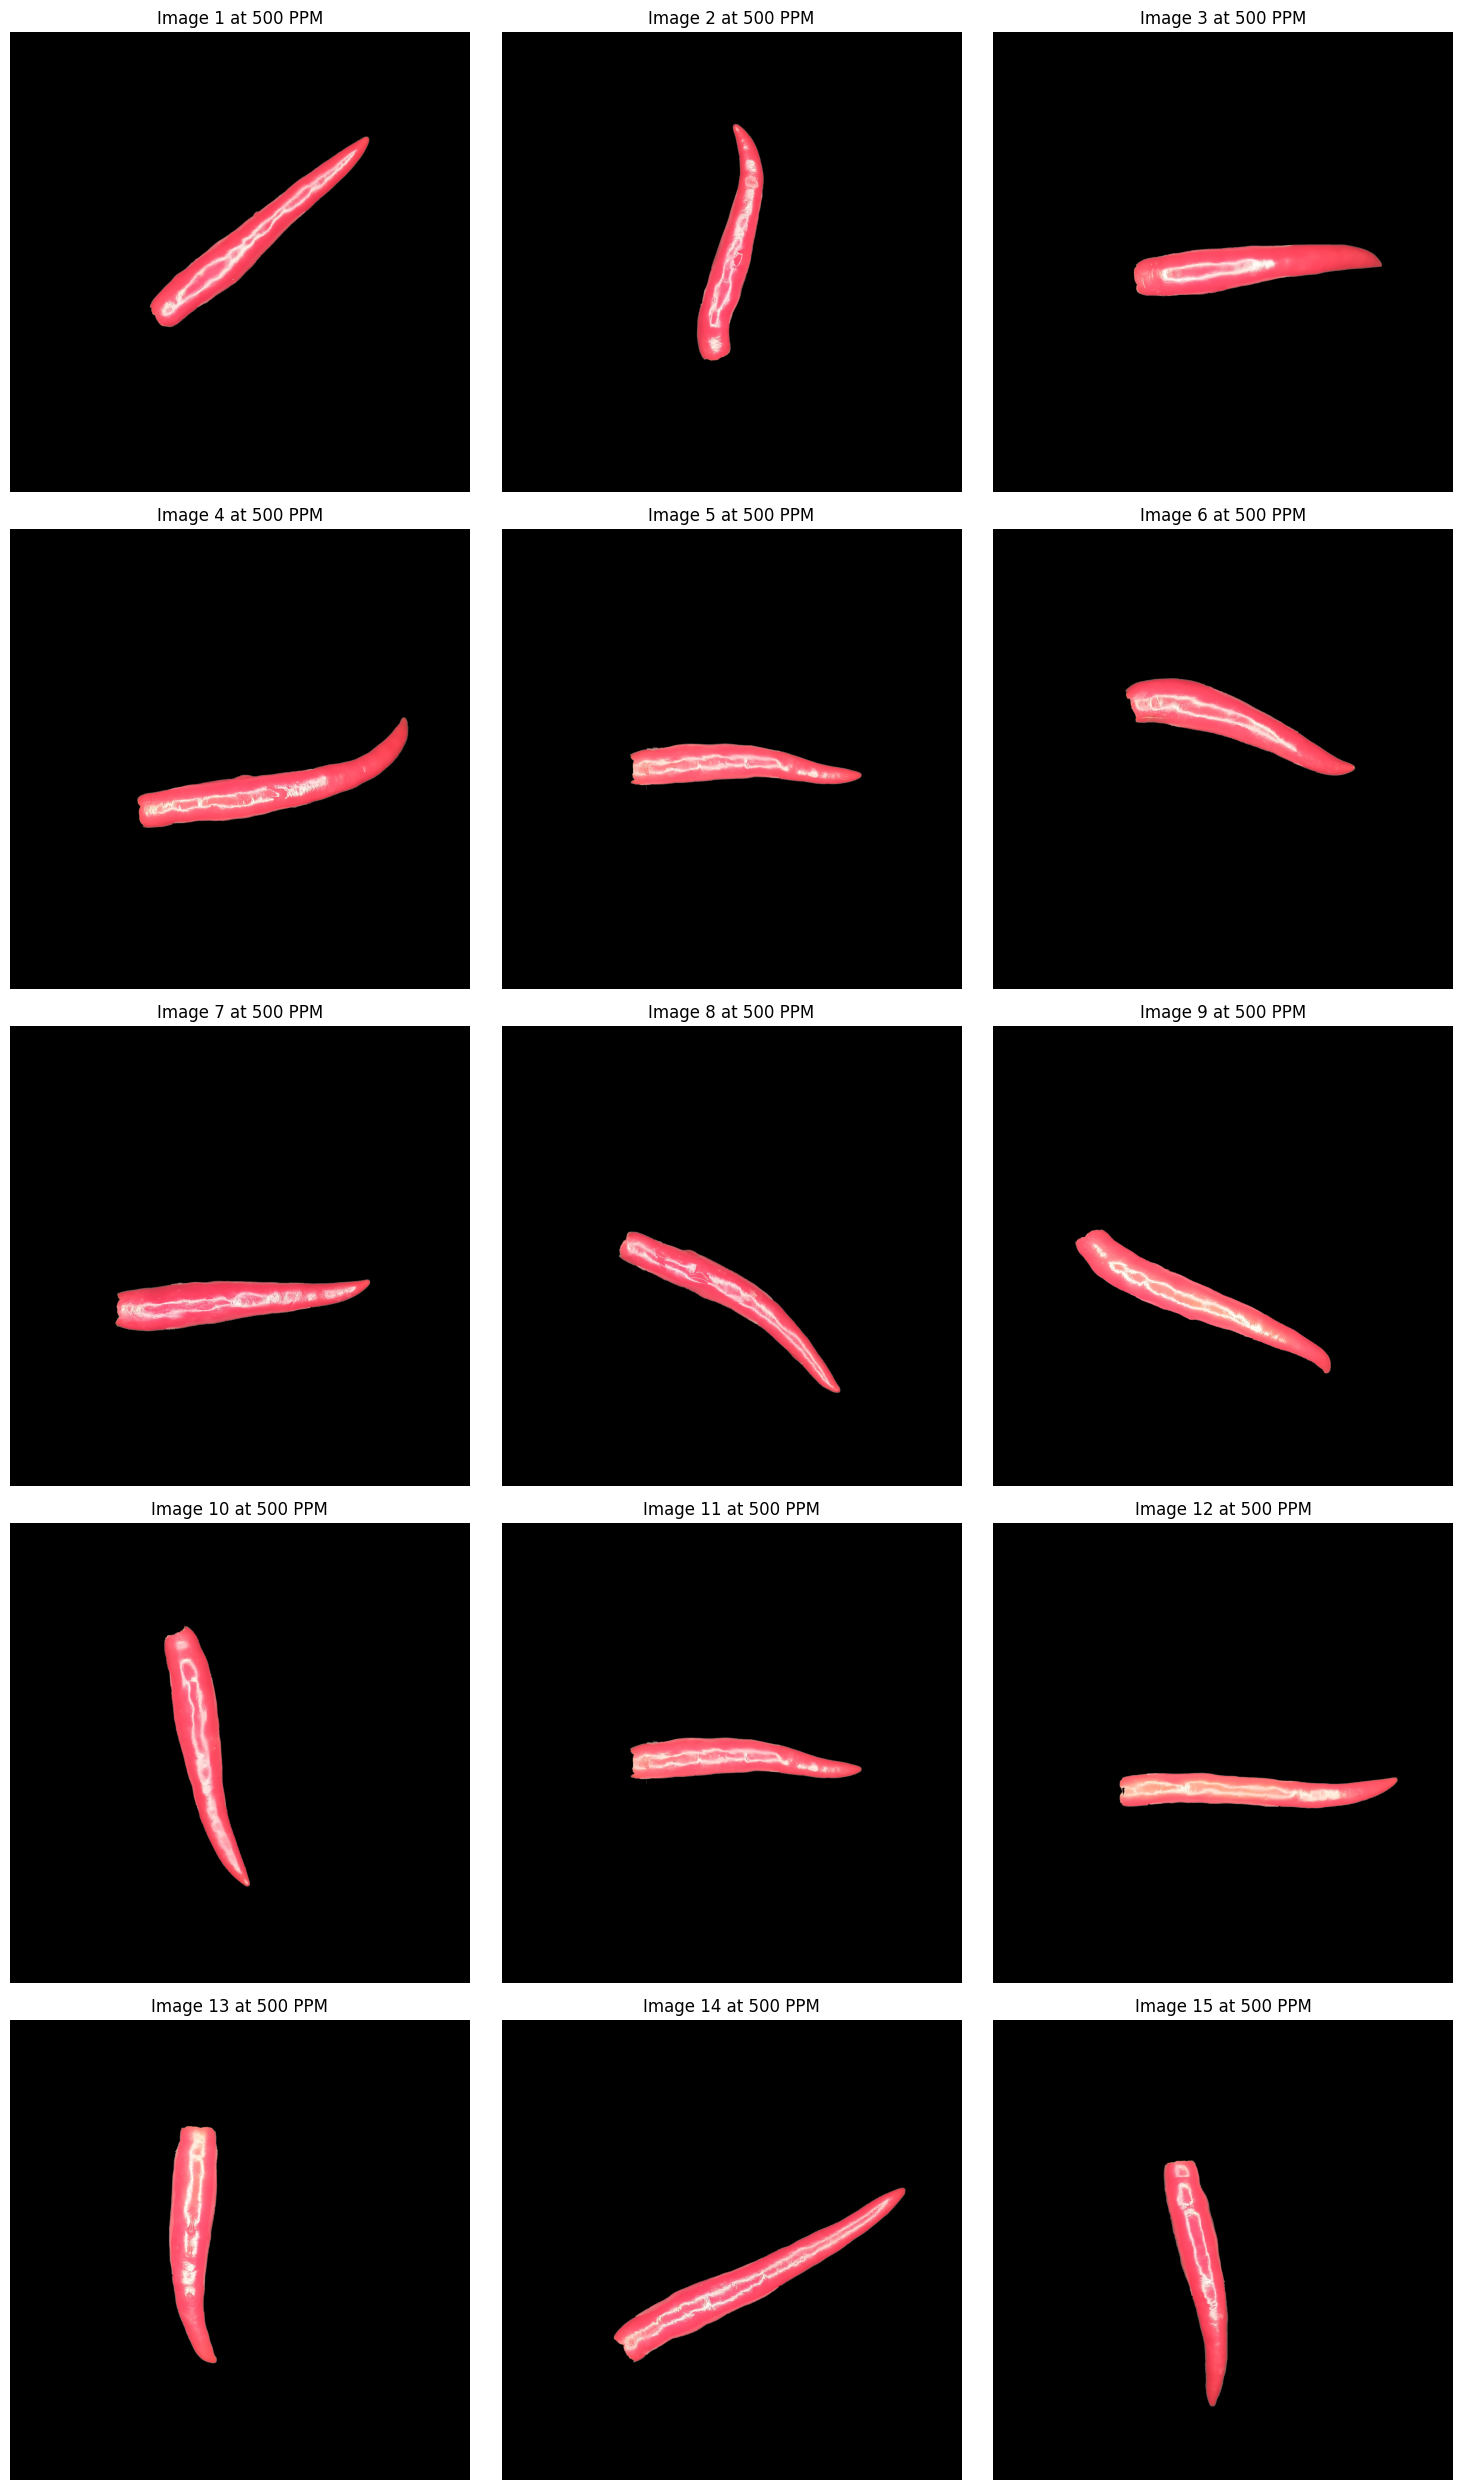

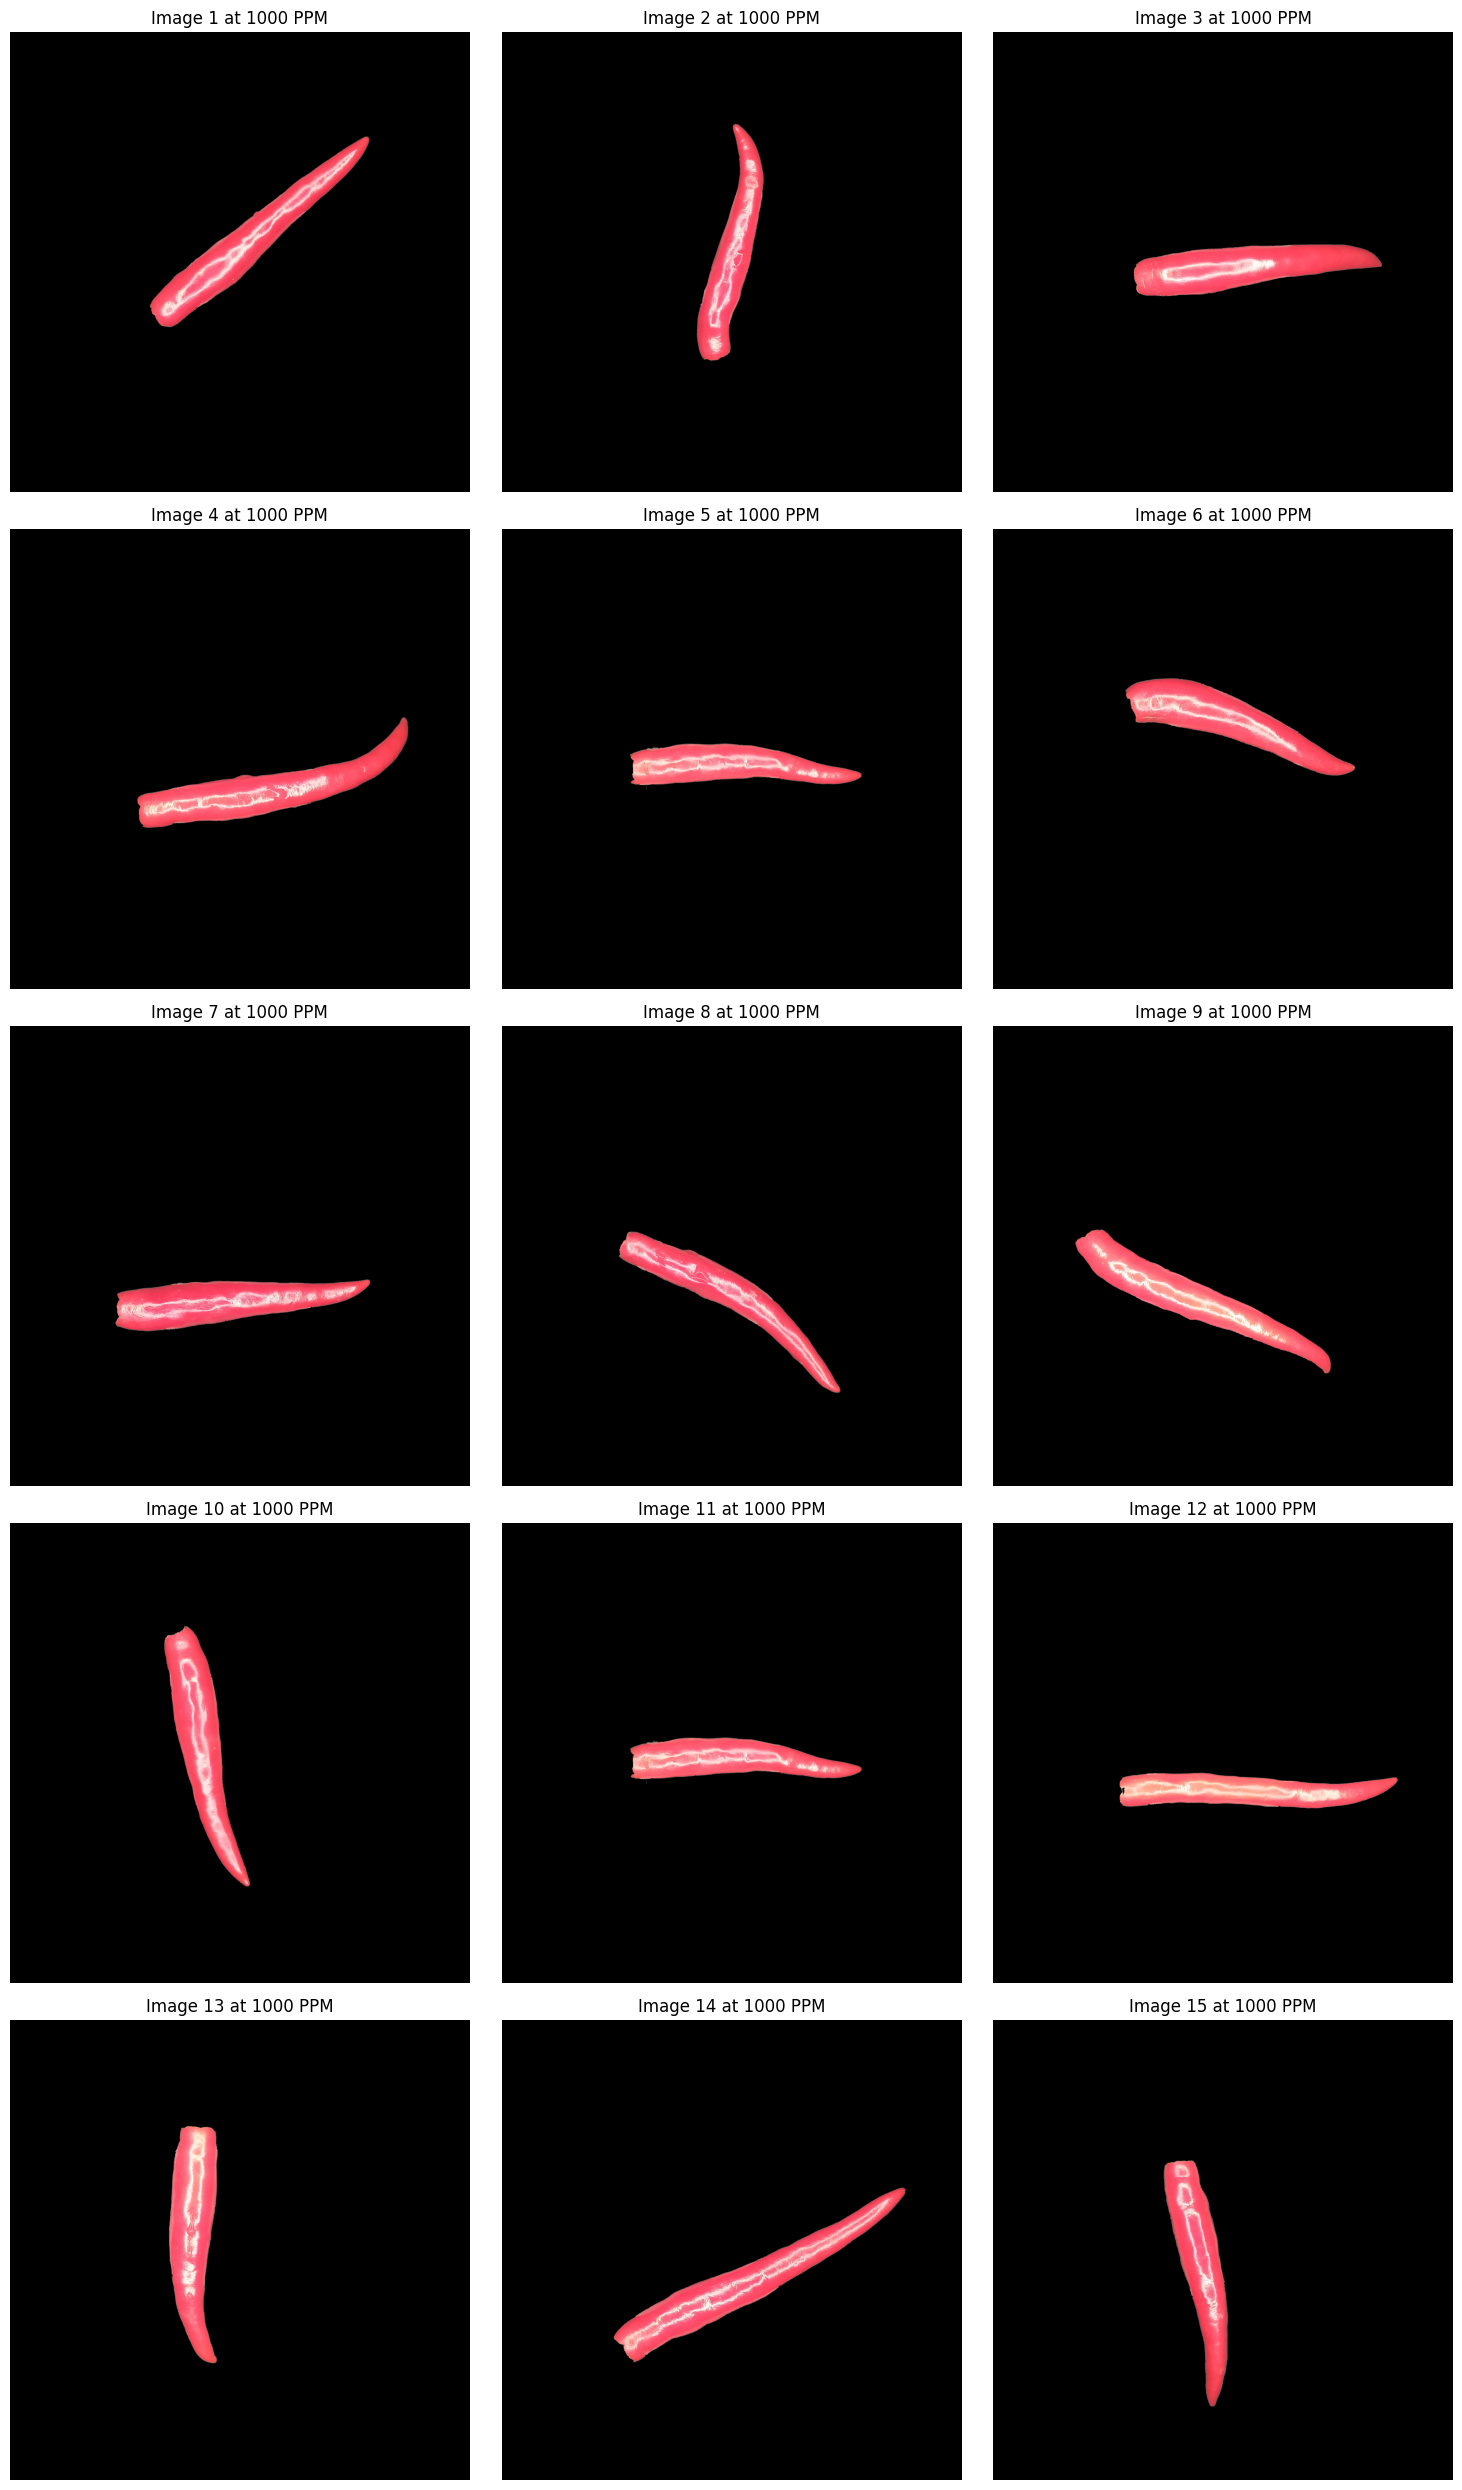

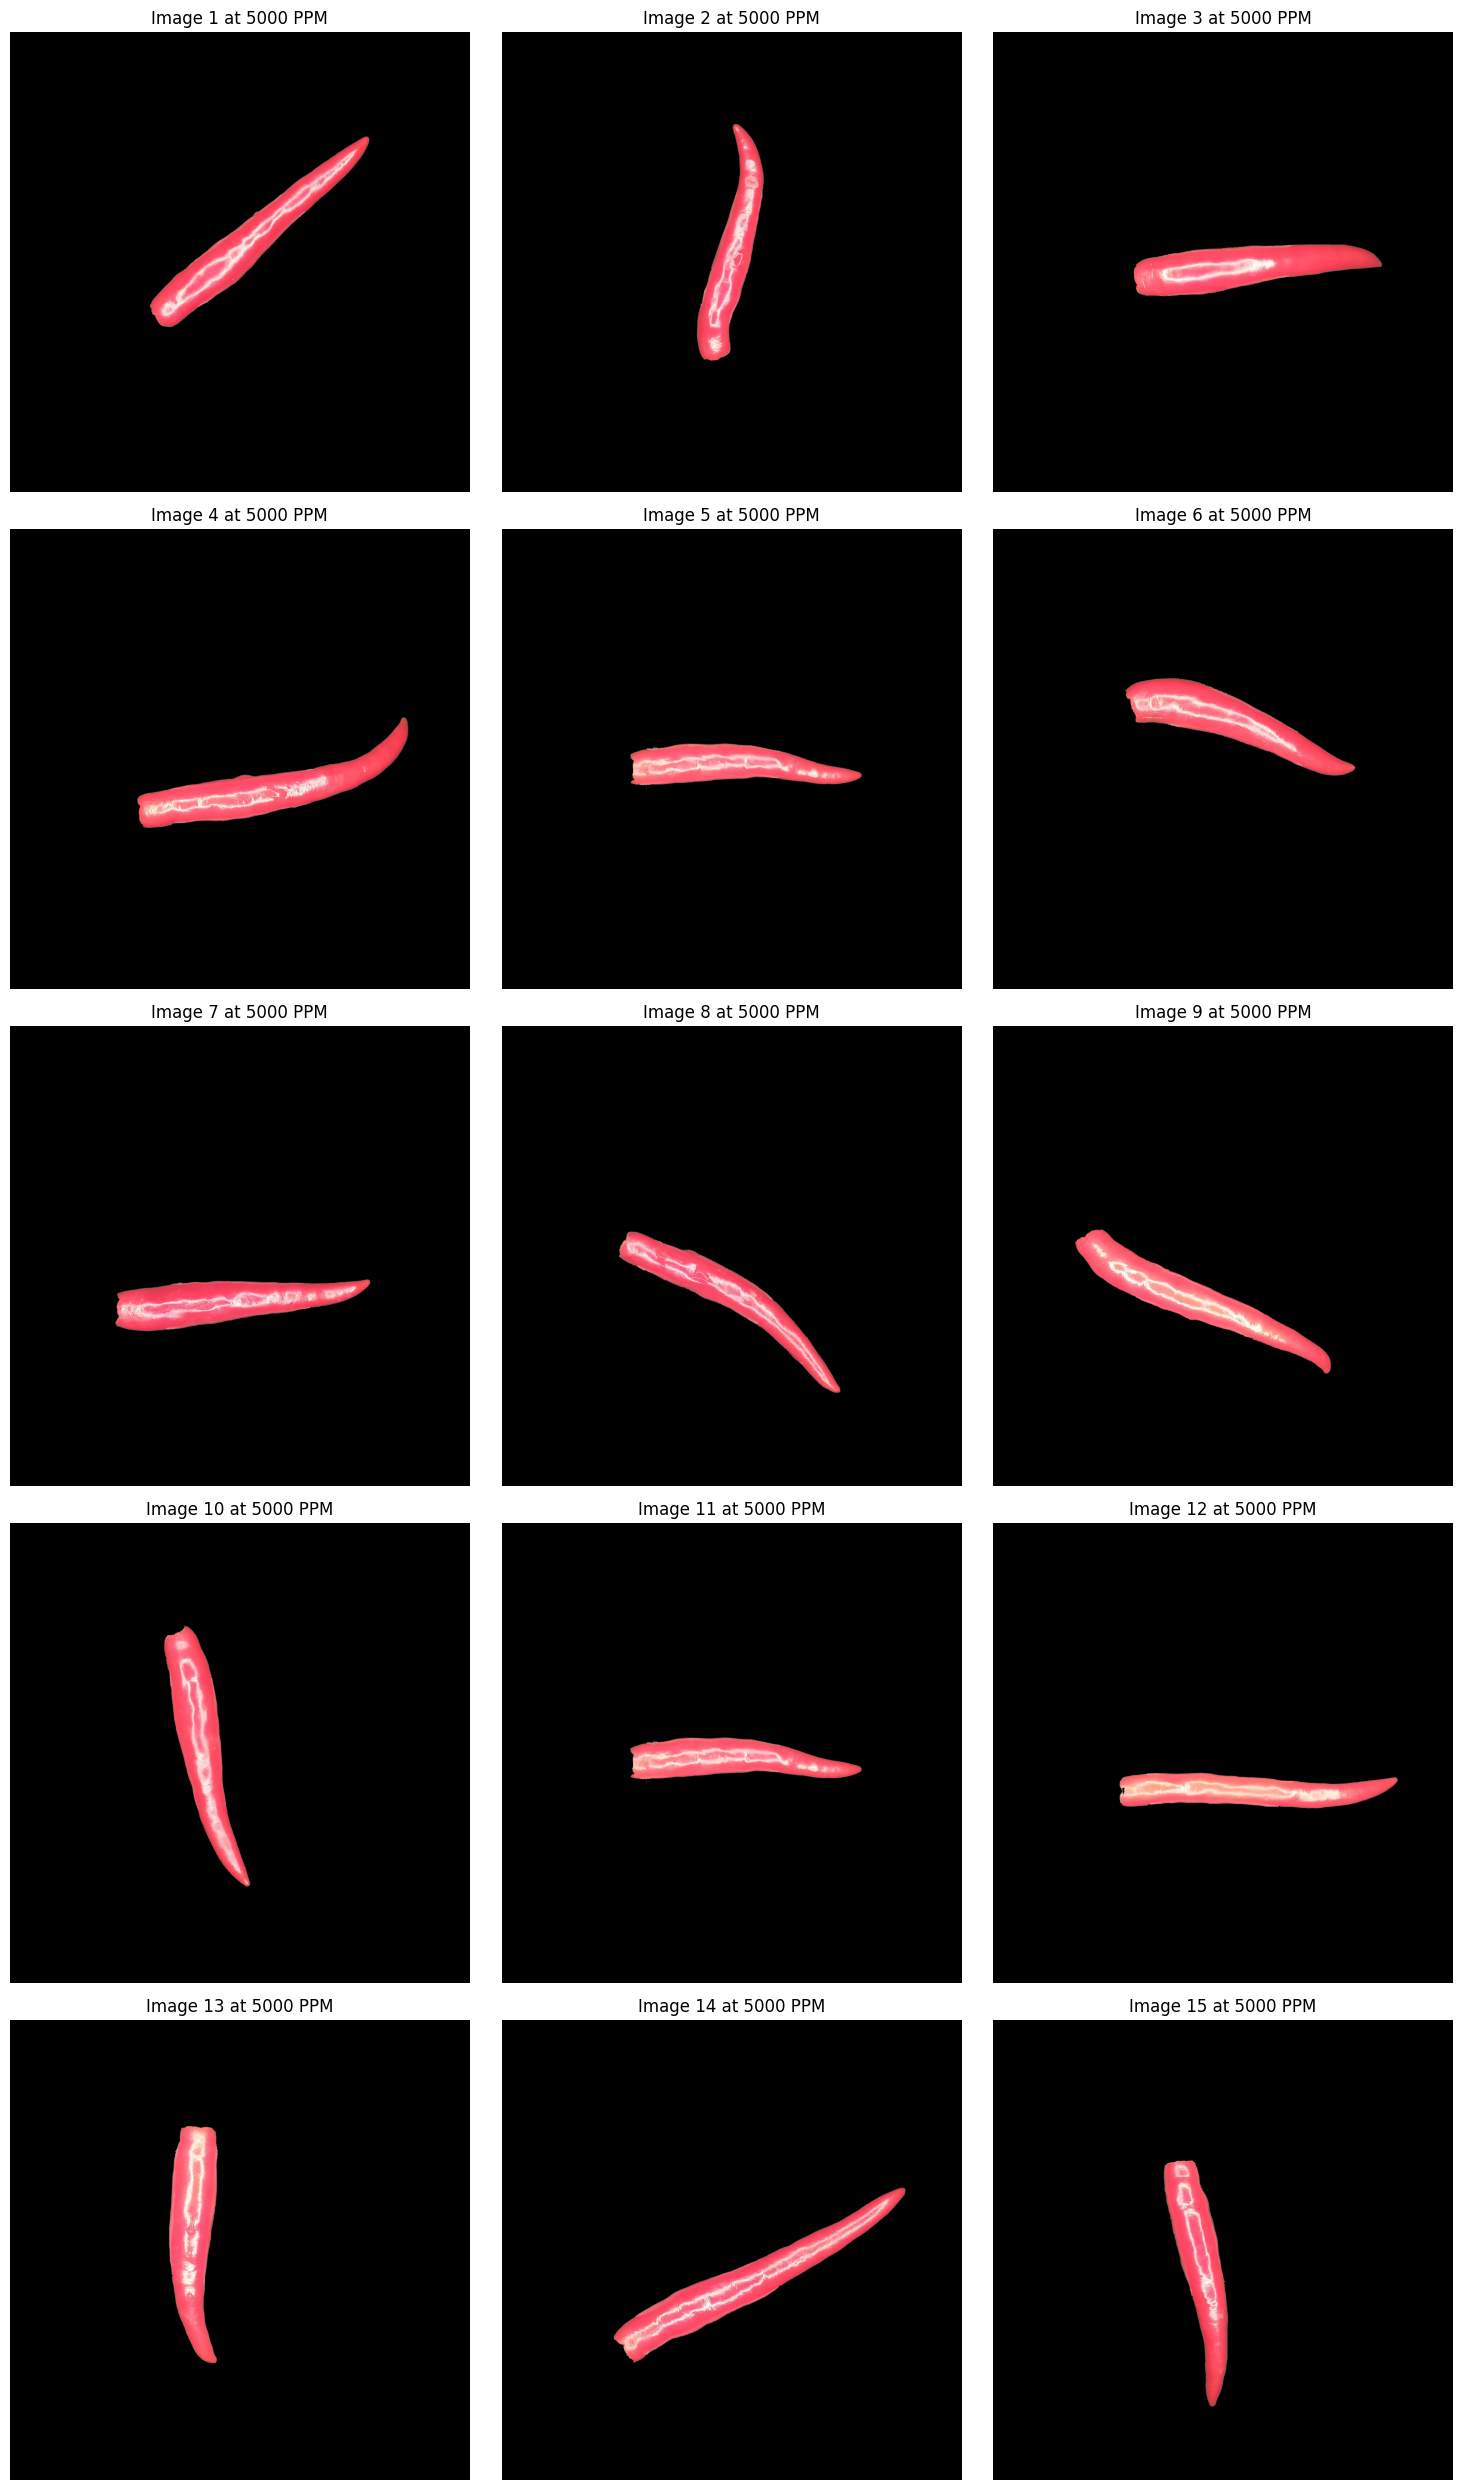

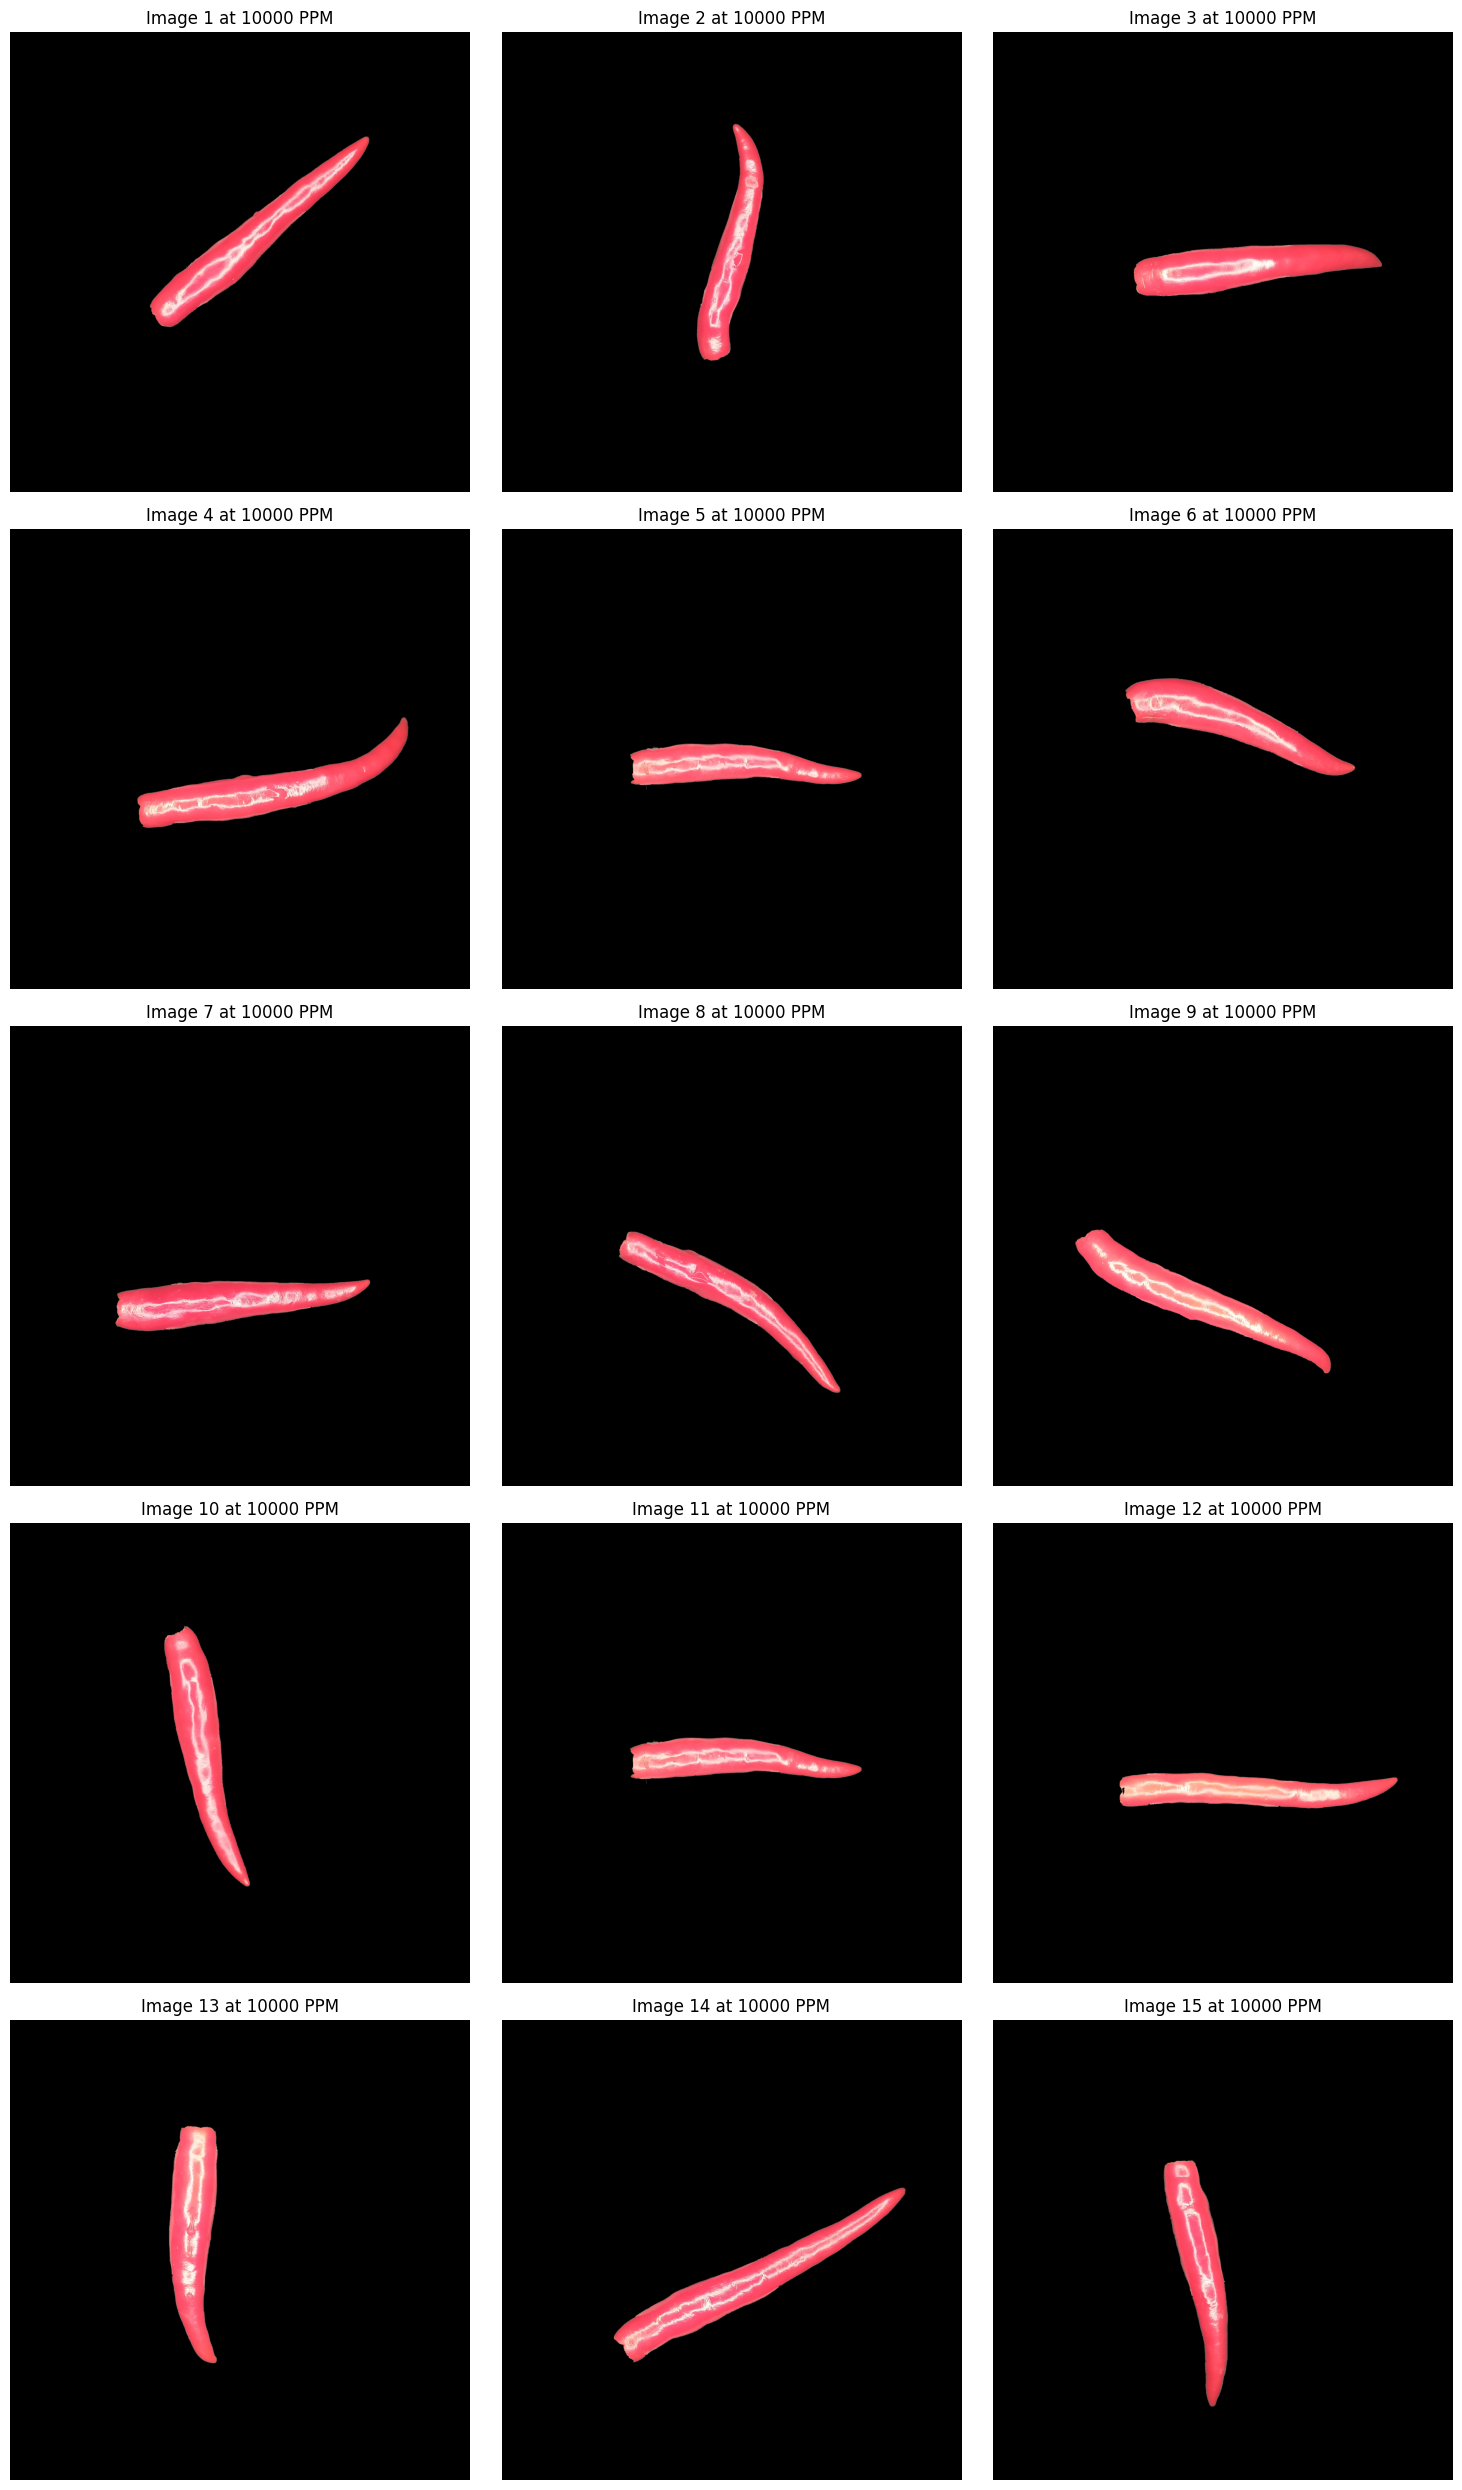

In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the list of ppm values
ppm_values = [0, 10, 100, 500, 1000, 5000, 10000]

# Calculate the number of rows needed
num_images = 15  # Assuming there are 15 images per ppm
num_rows = (num_images + 2) // 3  # Round up to the nearest multiple of 3

# Loop through each ppm value
for ppm in ppm_values:
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

    # Loop through each image number
    for image_num in range(1, num_images + 1):
        # Load the image
        image_path = f'/content/drive/MyDrive/Tugas Akhir_Zulfa Hana Maulida(1)/Dataset/Image/Multiclass/0 ppm/{image_num}.jpg'
        image = cv2.imread(image_path)

        # Convert the image to the HSV color space
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define lower and upper bounds for the red color range
        lower_red = np.array([0, 50, 100])
        upper_red = np.array([10, 255, 255])

        mask1 = cv2.inRange(hsv, lower_red, upper_red)

        lower_red = np.array([160, 100, 100])
        upper_red = np.array([180, 255, 255])

        mask2 = cv2.inRange(hsv, lower_red, upper_red)

        mask = cv2.bitwise_or(mask1, mask2)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Initialize variables to store the largest contour and its area
        largest_contour = None
        largest_area = 0

        # Filter contours based on area to identify larger red regions
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > largest_area:
                largest_area = area
                largest_contour = contour

        # If a valid contour is found, draw it on a blank mask
        if largest_contour is not None:
            chili_mask = np.zeros_like(mask)
            cv2.drawContours(chili_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

            # Apply the mask to the original image to get the segmented chili
            segmented_chili = cv2.bitwise_and(image, image, mask=chili_mask)

            # Plot the segmented chili on the corresponding subplot
            row_index = (image_num - 1) // 3
            col_index = (image_num - 1) % 3
            axes[row_index, col_index].imshow(cv2.cvtColor(segmented_chili, cv2.COLOR_BGR2RGB))
            axes[row_index, col_index].set_title(f"Image {image_num} at {ppm} PPM")
            axes[row_index, col_index].axis('off')

            # Save the segmented chili
            result_path = '/content/drive/MyDrive/Tugas Akhir_Zulfa Hana Maulida(1)/Preprocessing/ROI/Image/Multiclass/0 ppm'
            output_filename = f'{image_num}_Segmented.jpg'
            cv2.imwrite(os.path.join(result_path, output_filename), segmented_chili)
        else:
            print(f"No chili region found in {image_path}.")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
